Importing Required Libraries :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn  import metrics
from sklearn.model_selection import train_test_split as tt

In [3]:
data=pd.read_csv("wine.csv")

In [4]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
a=data.groupby("Wine")

In [6]:
for i,j in a:
    print(i)
    print(j)

1
    Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0      1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1      1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2      1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3      1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4      1    13.24        2.59  2.87  21.0  118     2.80        2.69   
5      1    14.20        1.76  2.45  15.2  112     3.27        3.39   
6      1    14.39        1.87  2.45  14.6   96     2.50        2.52   
7      1    14.06        2.15  2.61  17.6  121     2.60        2.51   
8      1    14.83        1.64  2.17  14.0   97     2.80        2.98   
9      1    13.86        1.35  2.27  16.0   98     2.98        3.15   
10     1    14.10        2.16  2.30  18.0  105     2.95        3.32   
11     1    14.12        1.48  2.32  16.8   95     2.20        2.43   
12     1    13.75        1.73  2.41  16.0   89     2.60        2.76   
13  

Data Visulaisation :

In [7]:
x=data["Alcohol"].tolist()

In [8]:
Y=data["Phenols"].tolist()

Text(0.5,1,'Relation between Alcohol and Phenols ')

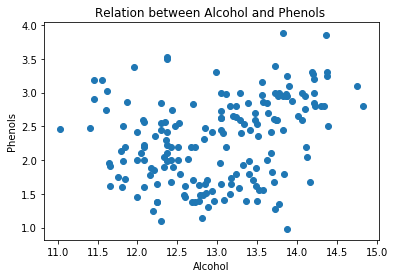

In [9]:
plt.scatter(x,Y)
plt.xlabel("Alcohol")
plt.ylabel("Phenols")
plt.title("Relation between Alcohol and Phenols ")

Data Pereperation :

In [10]:
X=data.drop(["Wine"],axis="columns")

In [11]:
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
y=data["Wine"]

In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Wine, dtype: int64

In [14]:
X_train,X_test,y_train,y_test=tt(X,y,train_size=0.9)

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
y_train.shape

(160,)

In [16]:
X_train.shape

(160, 13)

Model Training :

In [28]:
clf=RandomForestClassifier(n_estimators=10)

In [29]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
y_pred=clf.predict(X_test)

In [31]:
score=metrics.accuracy_score(y_test,y_pred)

In [32]:
score

1.0

In [35]:
print("The accuracy of the predicted result is {} %".format(score*100))

The accuracy of the predicted result is 100.0 %


In [36]:
clf.predict(np.array([14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480]).reshape(1,-1))

array([1], dtype=int64)